In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
import pandas as pd
from scipy.stats import norm
import random
import math
from matplotlib.ticker import MaxNLocator
import warnings

# Measure of central tendencies

## Mean

With a random sample of size `n`:
$$ \bar{x} = \frac{1}{n} \sum_{i = 1}^n x_i $$

## Median

In an ordered dataset such as
> $ x_1 ≤ x_2 ≤ x_3 ≤ ... ≤ x_n $

if `n` is odd:
$$ p = \frac{n + 1}{2} $$
$$ \tilde{x} = x_p $$

If `n` is even:

$$ p = \frac{n}{2} $$
$$ \tilde{x} = \frac{x_p + x_{p+1}}{2} $$

## Mode

If $ X $ is a discrete random variable, the mode is the value $ x $ at which the probability mass function takes its maximum value. 

# Measure of deviation

## Variance

$ \mu $ is the mean:
$$ \sigma^2 = \frac{1}{n} \sum_{i=1}^n (x_i - \mu)^2$$
Can also be written:
$$ \sigma^2 = \mathbb{E}[x_i^2] - \mu^2 $$

## Standard deviation

$$ \sigma = \sqrt{Variance} = \sqrt{\sigma^2} $$

In [2]:
low_standard_deviation = np.array([-3, -2, -1, 0, 1, 2, 3])
high_standard_deviation = low_standard_deviation * 100
print(f"low_standard_deviation {low_standard_deviation}")
print(f"mean: {low_standard_deviation.mean()}")
print(f"variance: {low_standard_deviation.var()}")
print(f"standard deviation: {low_standard_deviation.std()}")
print()
print(f"high_standard_deviation {high_standard_deviation}")
print(f"mean: {high_standard_deviation.mean()}")
print(f"variance: {high_standard_deviation.var()}")
print(f"standard deviation: {high_standard_deviation.std()}")

low_standard_deviation [-3 -2 -1  0  1  2  3]
mean: 0.0
variance: 4.0
standard deviation: 2.0

high_standard_deviation [-300 -200 -100    0  100  200  300]
mean: 0.0
variance: 40000.0
standard deviation: 200.0


## Sample Variance

When working on a sample, one underestimates the variance of the population therefore we compute the unbiased variance instead:
$$ \sigma^2 = \frac{1}{n - 1} \sum_{i=1}^n (x_i - \mu)^2 $$

# Empirical Relationship between Mean, Median, and Mode

### Normal Distribution

mean: 3.637978807091713e-15, median: 3.552713678800501e-15


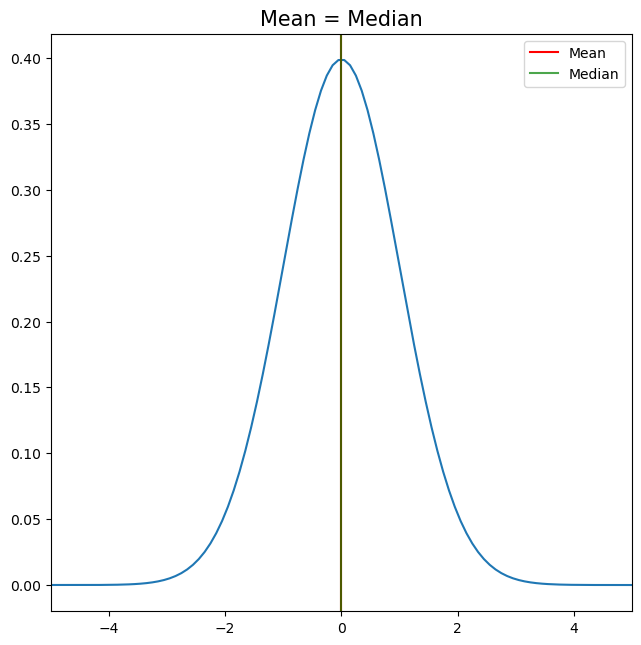

In [3]:
snd = stats.norm(0, 1)
x = np.linspace(-50, 50, 1000)
print(f"mean: {np.mean(x)}, median: {np.median(x)}")
plt.figure(figsize=(7.5,7.5))
plt.plot(x, snd.pdf(x))
plt.xlim(-5, 5)
plt.title('Mean = Median', fontsize='15')
plt.axvline(x=np.mean(x), color='r', label='Mean')
plt.axvline(x=np.median(x), color='g', label='Median', alpha=0.7)
plt.legend()
plt.show()

### Skewed distribution

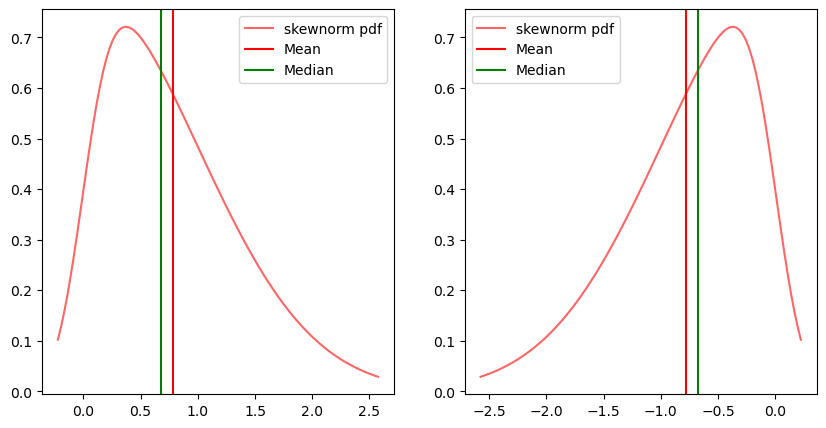

In [4]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

a = 5
x = np.linspace(stats.skewnorm.ppf(0.01, a),
                stats.skewnorm.ppf(0.99, a), 100)

b = -5
y =  np.linspace(stats.skewnorm.ppf(0.01, b),
                stats.skewnorm.ppf(0.99, b), 100)

ax1.plot(x, stats.skewnorm.pdf(x, a),
       'r-', alpha=0.6, label='skewnorm pdf')
ax1.axvline(x=stats.skewnorm.mean(a), color='r', label='Mean')
ax1.axvline(x=stats.skewnorm.median(a), color='g', label='Median')
ax1.legend()

ax2.plot(y, stats.skewnorm.pdf(y, b),
       'r-', alpha=0.6, label='skewnorm pdf')
ax2.axvline(x=stats.skewnorm.mean(b), color='r', label='Mean')
ax2.axvline(x=stats.skewnorm.median(b), color='g', label='Median')
ax2.legend()

### Quartile and percentile

[3 2 5 2 6 9 8 8 8 4 3 3 5 7 4 9 4 2 7 9 9 6 6 3 6 0 3 2 8 9]
iqr 5.0 is q3 8.0 - q1 3.0 = 5.0


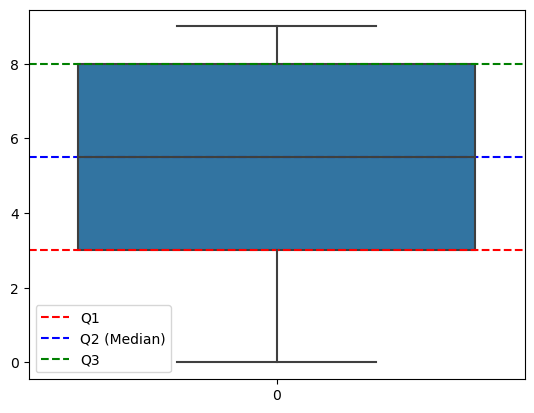

In [5]:
random_array = np.random.randint(0, 10, size=30)
print(random_array)
q1 = np.quantile(random_array, 0.25)
q2 = np.quantile(random_array, 0.50)
q3 = np.quantile(random_array, 0.75)
iqr = stats.iqr(random_array)
print(f"iqr {iqr} is q3 {q3} - q1 {q1} = {q3 - q1}")
plt.axhline(y=q1, color='red', linestyle='--', label='Q1')
plt.axhline(y=q2, color='blue', linestyle='--', label='Q2 (Median)')
plt.axhline(y=q3, color='green', linestyle='--', label='Q3')
sns.boxplot(random_array)
plt.legend()
plt.show()

Outliers are considered to be:
$$ outlier < Q1 - 1.5(IQR) $$ 
and 
$$ outlier > Q3 + 1.5(IQR) $$ 


### Range and mid-range

$$ Range(X) = Max(X) - Min(X) $$
$$ MidRange(X) = \frac{Max(X) + Min(X)}{2} $$


### Mean Absolute Deviation (MAD)

$$ Mean Absolute deviation = {\frac {1}{n}}\sum _{i=1}^{n}|x_{i}-m(X)| $$
$$ Median Absolute Deviation =\operatorname {median} (|X_{i}-{\tilde {X}}|) $$

In [6]:
mean = np.mean(random_array)
mean_abs_deviation = np.mean(np.absolute(random_array - np.mean(random_array)))
median_abs_deviation = stats.median_abs_deviation(random_array)

print(f"mean: {mean}")
print(f"mean standard deviation: {mean_abs_deviation}")
print(f"median standard deviation: {median_abs_deviation}")

mean: 5.333333333333333
mean standard deviation: 2.333333333333334
median standard deviation: 2.5


### z-score

How many standard deviation away from the mean. Gives you an idea of far from the mean a data point is.
- Positive score is above average, Negative below
- Close to 0 means it's not far from average 

$$ z={x-\mu  \over \sigma } $$

## Normal distribution

Empirical rule:
- +/- $ 1 \sigma $ 68% of the data points
- +/- $ 2 \sigma $ 95% of the data points
- +/- $ 3 \sigma $ 99.7% of the data points

`Python LIBRARY` : [scipy.stats.norm](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html)
- scipy.stats.norm.pdf : Probability Density Function
- scipy.stats.norm.pdf: Percent Point Function
- scipy.stats.norm.cdf: Cumulative Distribution Function

(-5.0, 5.0)

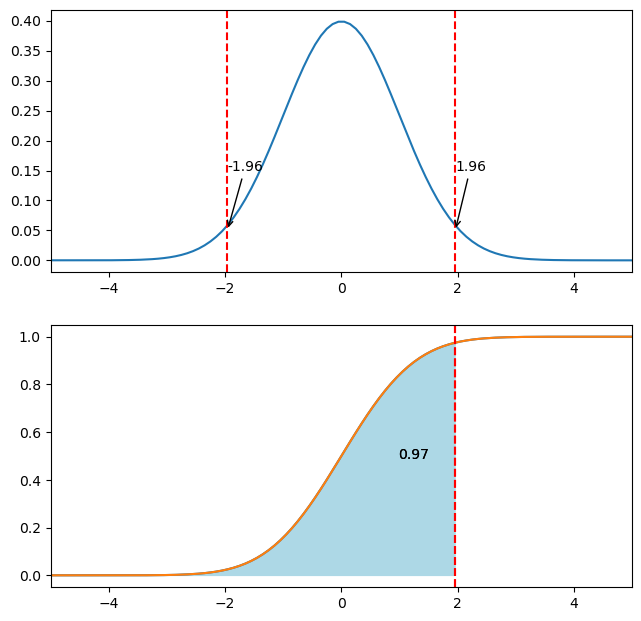

In [7]:
snd = stats.norm(0, 1)
x = np.linspace(-50, 50, 1000)

pdf_values = snd.pdf(x)
cdf_values = snd.cdf(x)

threshold_above = snd.ppf(0.975)  # Two standard deviations above (97.5% percentile)
threshold_below = snd.ppf(0.025)  # Two standard deviations below (2.5% percentile)

probability = snd.cdf(threshold_above)

plt.figure(figsize=(7.5,7.5))

plt.subplot(2, 1, 1)
plt.plot(x, pdf_values)
plt.axvline(x=threshold_above, color='r', linestyle='--')
plt.axvline(x=threshold_below, color='r', linestyle='--')
plt.annotate(f'{threshold_above:.2f}', xy=(threshold_above, 0.05), xytext=(threshold_above, 0.15),
             arrowprops=dict(facecolor='black', arrowstyle='->'))
plt.annotate(f'{threshold_below:.2f}', xy=(threshold_below, 0.05), xytext=(threshold_below, 0.15),
             arrowprops=dict(facecolor='black', arrowstyle='->'))
plt.xlim(-5, 5)

plt.subplot(2, 1, 2)
plt.plot(x, cdf_values)
plt.fill_between(x, 0, cdf_values, where=(x <= threshold_above), color='lightblue')
plt.axvline(x=threshold_above, color='r', linestyle='--')
# Calculate the midpoint within the filled area
plt.annotate(f'{probability:.2f}', xy=(threshold_above * 0.5, probability / 2))
plt.xlim(-5, 5)

plt.subplot(2, 1, 2)
plt.plot(x, cdf_values)
plt.fill_between(x, 0, cdf_values, where=(x <= threshold_above), color='lightblue')
plt.axvline(x=threshold_above, color='r', linestyle='--')
# Calculate the midpoint within the filled area
plt.annotate(f'{probability:.2f}', xy=(threshold_above * 0.5, probability / 2))
plt.xlim(-5, 5)

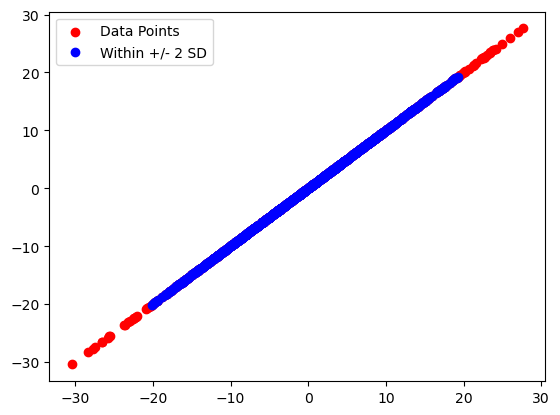

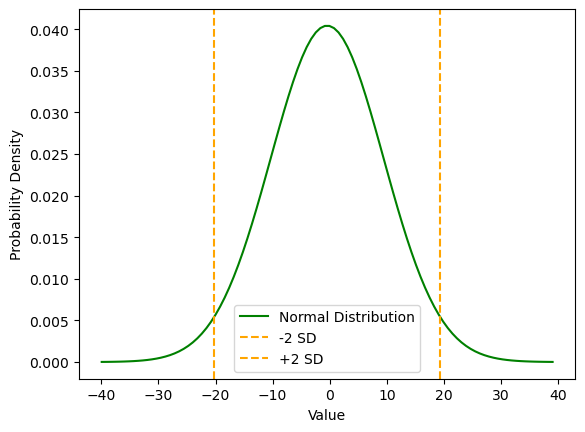

In [8]:
# Generate random data following a normal distribution
np.random.seed(0)
data = np.random.normal(0, 10, 1000)  # Mean=0, Standard deviation=10

# Calculate mean and standard deviation
mean = np.mean(data)
std = np.std(data)

# Define the threshold for highlighting points
threshold = 2 * std

# Separate points within +/- 2 standard deviations
within_threshold = data[(data >= mean - threshold) & (data <= mean + threshold)]
outside_threshold = data[(data < mean - threshold) | (data > mean + threshold)]

plt.figure()
# Create scatter plot
plt.scatter(data, data, color='red', label='Data Points')
plt.scatter(within_threshold, within_threshold, color='blue', label='Within +/- 2 SD')
plt.legend()

plt.figure()
x = np.linspace(mean - 4 * std, mean + 4 * std, 100)
y = stats.norm.pdf(x, mean, std)
plt.plot(x, y, color='green', label='Normal Distribution')
plt.axvline(mean - threshold, color='orange', linestyle='--', label='-2 SD')
plt.axvline(mean + threshold, color='orange', linestyle='--', label='+2 SD')
plt.legend()
plt.xlabel('Value')
plt.ylabel('Probability Density')

# Add legend and labels
# Display the plot
plt.show()

### Central Limit theorem

For independent and identically distributed random variables, the sampling distribution of the standardized sample mean tends towards the standard normal distribution even if the original variables themselves are not normally distributed.

In [9]:
# Creating the distribution
data = np.arange(1,10,0.01)
pdf = norm.pdf(data , loc = 5.3 , scale = 1 )

## Scatter plot analysis

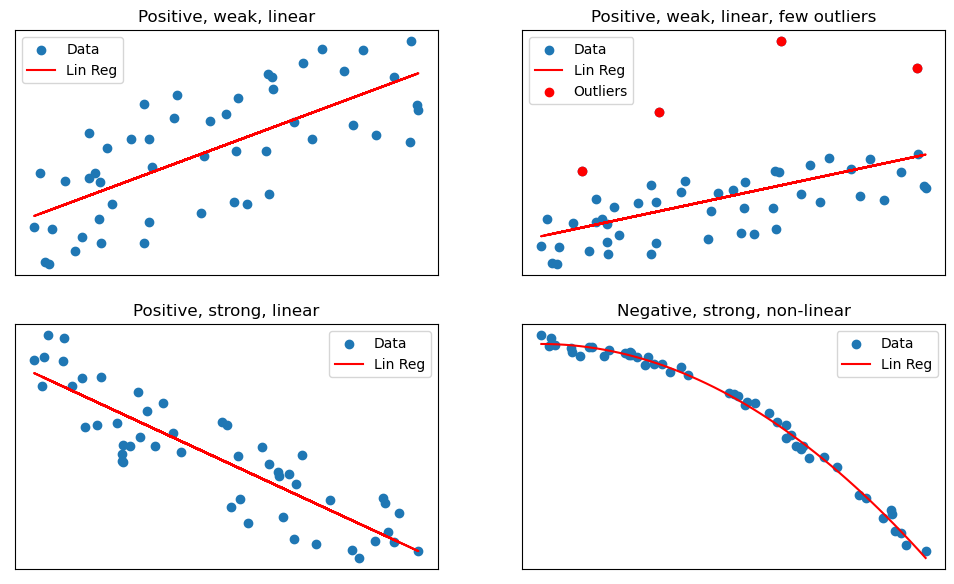

In [10]:
np.random.seed(42)
num_points = 50

x1 = np.random.uniform(low=0, high=10, size=num_points)
y1 = x1 + np.random.uniform(low=0, high=10, size=num_points)
reg1 = stats.linregress(x1, y1)

x2 = x1.copy()
y2 = y1.copy()
outlier_indices = np.random.choice(range(num_points), size=4, replace=False)
y2[outlier_indices] += np.random.uniform(low=10, high=20, size=4)
reg2 = stats.linregress(x2, y2)


x3 = np.random.uniform(low=0, high=10, size=num_points)
y3 = -2 * x3 + 10 + np.random.uniform(low=0, high=10, size=num_points)
reg3 = stats.linregress(x3, y3)

x4 = x3.copy()
y4 = -2 * x4**2 + np.random.normal(loc=0, scale=5, size=num_points)
model = np.poly1d(np.polyfit(x4, y4, 2))
polyline = np.linspace(min(x4), max(x4))


fig, axes = plt.subplots(2, 2, figsize=(12, 7))
axes[0][0].scatter(x1, y1, label='Data')
axes[0][0].plot(x1, reg1.intercept + reg1.slope * x1, 'r', label='Lin Reg')
axes[0][0].set_title('Positive, weak, linear')

axes[0][1].scatter(x2, y2, label='Data')
axes[0][1].plot(x2, reg2.intercept + reg2.slope * x2, 'r', label='Lin Reg')
axes[0][1].scatter(x2[outlier_indices], y2[outlier_indices], color='red', label='Outliers')
axes[0][1].set_title('Positive, weak, linear, few outliers')

axes[1][0].scatter(x3, y3, label='Data')
axes[1][0].plot(x3, reg3.intercept + reg3.slope * x3, 'r', label='Lin Reg')
axes[1][0].set_title('Positive, strong, linear')

axes[1][1].scatter(x4, y4, label='Data')
axes[1][1].plot(polyline, model(polyline), 'r', label='Lin Reg')
axes[1][1].set_title('Negative, strong, non-linear')

for ax in axes.flat:
	ax.set_xticks([])
	ax.set_yticks([])
	ax.legend()
plt.show()

## Correlation coefficient

$$ {r\in \mathbb{R} \mid -1<x<1} $$
For a Sample, we could see the correlation of the z-score:
$$ {\displaystyle r_{xy}={\frac {1}{n-1}}\sum _{i=1}^{n}\left({\frac {x_{i}-{\bar {x}}}{s_{x}}}\right)\left({\frac {y_{i}-{\bar {y}}}{s_{y}}}\right)} $$

Computing the equation of a least-squares regression line:
$$ \hat y = mx + b$$
With:
$$ m = r \frac{S_y}{S_x}$$
One point of the regression line is $(\bar x, \bar y)$


### R-squared - Coefficient of determination

Provides information of the goodness of a fit model.
How much of the variation in y is described by the variation of x.

$$ R^2 = 1 - \frac{Sum \, Squared \, Regression (SSR)}{Total \, Sum \, of \, Squares (SST)}$$
$$ R^2 = 1 - \frac{\sum_{i=1}^n (y_i - \hat y)^2} {\sum _{i=1}^n (y_i - \bar y)^2}$$
$$ R^2 = 1 - \frac{Unexplained \, variation} {Total \, variation}$$

### Covariance
 



$$ cov(X, Y) = E[XY] - E[X]E[Y]$$

## Probability

$$ 0 \leq P(A) \leq 1$$
$$ P(\bar A) = 1 - P(A)$$
$$ P(A∪B) = P(A) + P(B) – P(A∩B) $$
$$ P(A∣B)= \frac{P(B)}{P(A∩B)} $$
Bayes Formula: $$ P(A | B) = \frac{P(B∣A).P(A)}{P(B)} $$
Indepedent probability: $$ P(A∩B) = P(A) ⋅ P(B) $$
​


### Permutation

$$ {\displaystyle {\binom {n}{k}}={\frac {n!}{k!(n-k)!}}.} $$

Chance of having at least two persons with the same birthday out of a group of 30:

In [11]:
all_different_birthday = math.factorial(365) / math.factorial(365 - 30) / 365**30
same_birthday = 1 - all_different_birthday
same_birthday

0.7063162427192686

## Discrete random variables

A continuous random variable can take on any value within a certain range or interval.<br>
On the other hand, a discrete random variable can only take on a finite or countably infinite number of distinct values.

In [12]:
test = 0.5 * 0.5
test

0.25

In [13]:
X = np.array([x for x in range(5)])
PX = np.array([0.1, 0.15, 0.4, 0.25, 0.1])
EX = X * PX
mean = np.sum(EX)
variance = np.sum((X - mean) ** 2 * PX)
std = math.sqrt(variance)
print(f"{mean} {variance} {std}")

2.1 1.19 1.0908712114635715


## Probabilty density function

$$ \displaystyle \Pr[a\leq X\leq b]=\int _{a}^{b}f_{X}(x)\,dx. $$

### Shifting
$$ Y = X + k $$
$$ \mu _Y = \mu _X + k , \, \sigma _Y = \sigma _X$$

### Scaling
$$ Z = kX $$
$$ \mu _Y = k\mu _X, \, \sigma _Y = k \sigma _X$$

## Combining random variable

$$ E(X + Y) = \mu _X + \mu _Y $$
$$ E(X - Y) = \mu _X - \mu _Y $$
Assuming X and Y are independent:
$$ Var(X + Y) = Var(X) - Var(Y) $$

## Binomial variables

10% rule: it suggests that the sample size should be at least 10% of the population size when sampling from a large population.

the binomial distribution with parameters n and p is the discrete probability distribution of the number of successes in a sequence of n independent experiments, each asking a yes–no question, and each with its own Boolean-valued outcome: success (with probability p) or failure (with probability a = 1 - p)

$$ n ∈ \mathbb {N}, \quad p ∈ [0,1], \quad X \sim B(n, p).$$ 
$$ Pr(X = k) = \binom {n}{k} p^k (1 - p)^{n - k} $$
With:
$$ \binom {n}{k} = \frac{n!}{k!(n - k)!}

### Mean and variance

$$ \mu = np$$
$$ \sigma^2 = n  p ( 1 - p) $$


[2 3 5 2 1 3 1 2 0 0]
[4 6 6 7 8 8 8 7 6 6]
binomial n = 10, p = 0.2 - mean: 2.0, var:1.2649110640673518
binomial n = 10, p = 0.7 - mean: 7.0, var:1.449137674618944


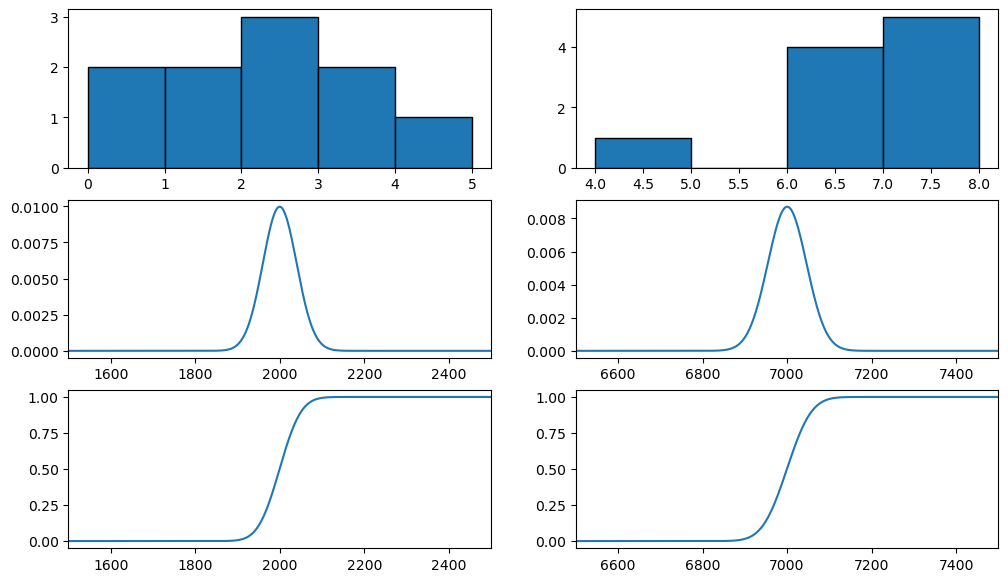

In [14]:
warnings.filterwarnings("ignore", category=RuntimeWarning)
n = 10  # Number of trials
p1 = 0.2  # Probability of success
p2 = 0.7

# Create a binomial distribution object
binom_dist_p1 = stats.binom(n, p1)
binom_dist_p2 = stats.binom(n, p2)

# Generate random variables from the distribution
random_p1 = binom_dist_p1.rvs(size=10)
random_p2 = binom_dist_p2.rvs(size=10)

print(random_p1)
print(random_p2)
print(f"binomial n = 10, p = 0.2 - mean: {binom_dist_p1.mean()}, var:{binom_dist_p1.std()}")
print(f"binomial n = 10, p = 0.7 - mean: {binom_dist_p2.mean()}, var:{binom_dist_p2.std()}")

huge_dist_p1 = stats.binom(10000, p1)
huge_dist_p2 = stats.binom(10000, p2)
x = range(10001)

fig, axes = plt.subplots(3, 2, figsize=(12, 7))
axes[0][0].hist(random_p1, bins=range(min(random_p1), max(random_p1) + 1), edgecolor='black')
axes[0][1].hist(random_p2, bins=range(min(random_p2), max(random_p2) + 1), edgecolor='black')
axes[1][0].plot(x, huge_dist_p1.pmf(x), label='p1')
axes[1][0].set_xlim(1500, 2500)
axes[1][1].plot(x, huge_dist_p2.pmf(x), label='p2')
axes[1][1].set_xlim(6500, 7500)
axes[2][0].plot(x, huge_dist_p1.cdf(x), label='p1')
axes[2][0].set_xlim(1500, 2500)
axes[2][1].plot(x, huge_dist_p2.cdf(x), label='p2')
axes[2][1].set_xlim(6500, 7500)
plt.show()





## Geometric random variable

Geometric distribution is a type of discrete probability distribution that represents the probability of the number of successive failures before a success is obtained in a Bernoulli trial.

PMF:$$ P(X = x) = (1 - p)^{x - 1} p $$
CDF:$$ P(X ≤ x) = 1 - (1 - p)^x $$
Mean: $$E[X] = \frac{1}{p}$$
Variance: $$ Var[X] = \frac{(1 - p)}{p^2}$$

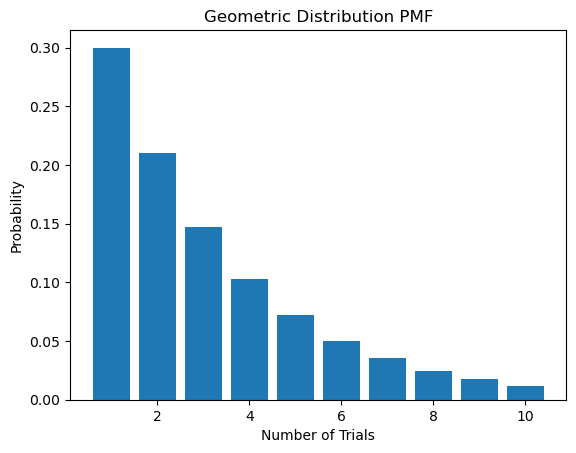

In [15]:
p = 0.3  # Probability of success

# Create a geometric distribution object
geom_dist = stats.geom(p)

# Generate random variables from the distribution
random_variables = geom_dist.rvs(size=1000)

# Calculate mean and variance
mean = geom_dist.mean()
variance = geom_dist.var()

# Plot the probability mass function (PMF)
x = np.arange(1, 11)
pmf = geom_dist.pmf(x)
plt.bar(x, pmf)
plt.xlabel('Number of Trials')
plt.ylabel('Probability')
plt.title('Geometric Distribution PMF')
plt.show()

## Poisson distribution

The Poisson distribution is a discrete probability distribution that expresses the probability of a given number of events occurring in a fixed interval of time or space if these events occur with a known constant mean rate and independently of the time since the last event.

Mean: $$ k $$
PMF: $$ P(X = k) = \frac{\lambda ^k e^{- \lambda}}{k!}$$

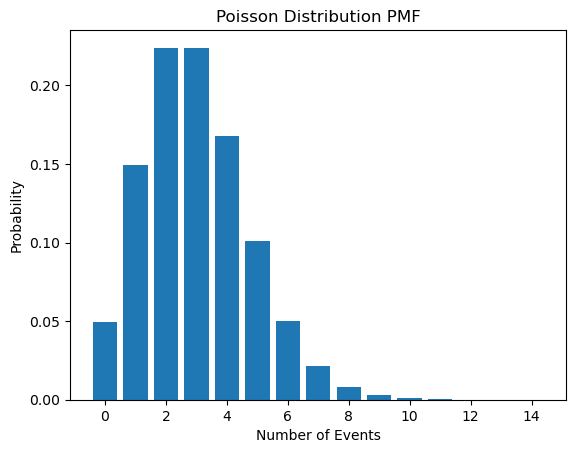

Probability of getting exactly 5 events: 0.10081881344492458
Cumulative probability of getting less than or equal to 5 events: 0.9160820579686966


In [16]:
lambda_ = 3  # Average rate or intensity parameter

# Create a Poisson distribution object
poisson_dist = stats.poisson(mu=lambda_)

# Generate random variables from the distribution
random_variables = poisson_dist.rvs(size=1000)

# Calculate PMF for a range of values
x = np.arange(0, 15)
pmf = poisson_dist.pmf(x)

# Plot the PMF
plt.bar(x, pmf)
plt.xlabel('Number of Events')
plt.ylabel('Probability')
plt.title('Poisson Distribution PMF')
plt.show()

# Calculate the probability of getting exactly k events
k = 5
prob_k = poisson_dist.pmf(k)
print(f"Probability of getting exactly {k} events: {prob_k}")

# Calculate the cumulative probability of getting less than or equal to k events
cum_prob_k = poisson_dist.cdf(k)
print(f"Cumulative probability of getting less than or equal to {k} events: {cum_prob_k}")

## Sample mean

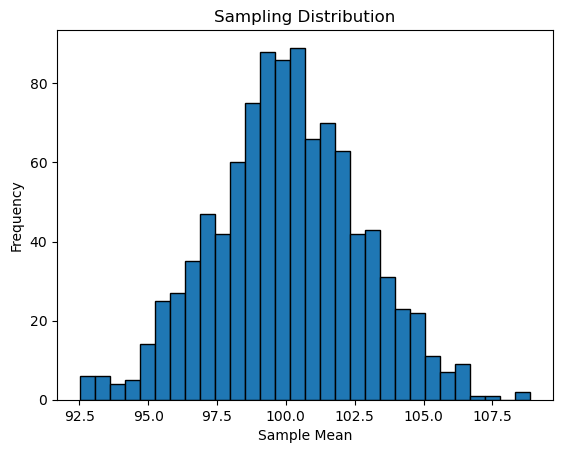

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Population parameters
population_mean = 100
population_std = 15

# Sample parameters
sample_size = 30
num_samples = 1000

# Create an empty array to store sample means
sample_means = np.zeros(num_samples)

# Generate the sampling distribution
for i in range(num_samples):
    # Generate a random sample from the population
    sample = np.random.normal(population_mean, population_std, sample_size)
    # Calculate the sample mean
    sample_mean = np.mean(sample)
    # Store the sample mean in the array
    sample_means[i] = sample_mean

# Plot the sampling distribution
plt.hist(sample_means, bins=30, edgecolor='black')
plt.xlabel('Sample Mean')
plt.ylabel('Frequency')
plt.title('Sampling Distribution')
plt.show()